# Worksheet 12

Name:  Aidan Clark

UID: U01817265

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
4. Predicting the number of births occuring in a specified minute.

1 is. 2 is not. 3 is. 4 is not.

b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

Split the data into a training set and a testing set

c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

Underfitting is when the model is too "simple" and does not capture the general trend of the data. One sign of it is the model making a lot of errors when tested. Overfitting is when the model is too complex and takes too much of the noise into account. One sign of this is if the model makes very few errors on the training set, but makes a lot of errors on the testing set-- this indicates that the model doesn't generalize well to other datasets.

### K Nearest Neighbors

In [3]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

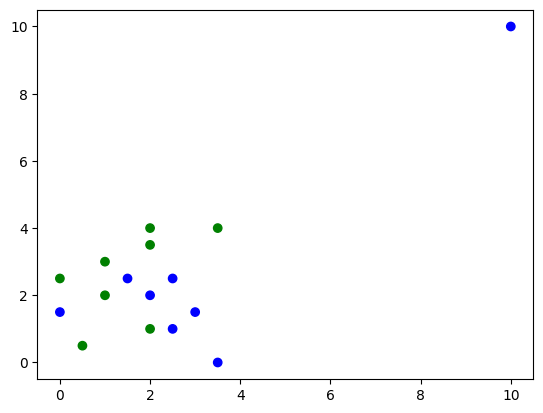

In [4]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(x = data["Attribute A"], y = data["Attribute B"], color=colors[data["Class"]].tolist())
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

Yes, the blue point at (10,10) is very far away from the other points in the dataset, so it is likely an outlier

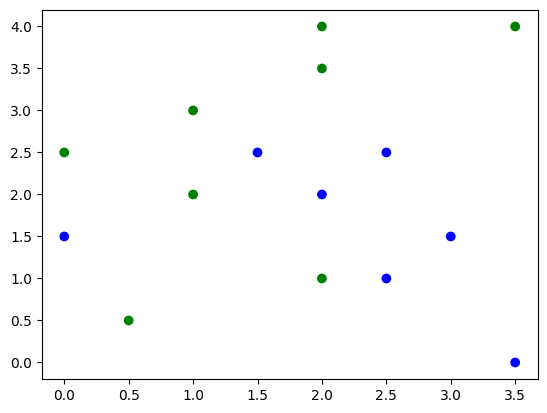

In [6]:
data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0.],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1],
}

plt.scatter(x = data["Attribute A"], y = data["Attribute B"], color=colors[data["Class"]].tolist())
plt.show()

Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

There's a blue point at (0,1.5) that is reasonably far away from the other blue points, and appears to be mixed in with the green points. It's likely a noise point, since it doesn't follow the general trend of the blue points

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

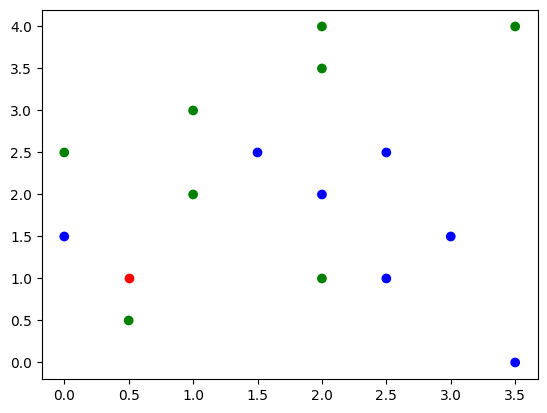

In [58]:
data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0.],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1],
}

plt.scatter(x = data["Attribute A"], y = data["Attribute B"], color=colors[data["Class"]].tolist())
plt.plot(0.5,1, 'ro')
plt.show()

e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

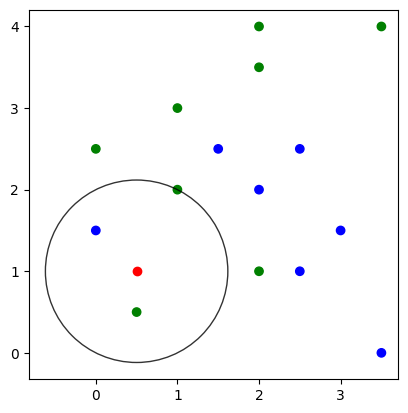

In [60]:
def n_closest_to(example, n, train):
    d = []
    for i in range(0, len(train["Attribute A"])):
        d.append((((train["Attribute A"][i] - example[0])**2 + (train["Attribute B"][i] - example[1])**2)**(1/2), i))

    s = sorted(d)
    
    return s[:n]


location = ( 0.5 , 1 )
radius = n_closest_to(location, 3, data)[2][0]
_, axes = plt.subplots()
axes.scatter(x = data["Attribute A"], y = data["Attribute B"], color=colors[data["Class"]].tolist())
plt.plot(0.5,1, 'ro')
cir = plt.Circle(location, radius, fill = False, alpha=0.8)
axes.add_patch(cir)
axes.set_aspect('equal') # necessary so that the circle is not oval
plt.show()


f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [62]:
def majority(points, train):
    groups = {}
    
    for point in points:
        if train["Class"][point[1]] not in groups:
            groups[train["Class"][point[1]]] = 1
        else:
            groups[train["Class"][point[1]]] += 1
    
    max = 0
    cl = -1
    for c in groups:
        if groups[c] >= max:
            max = groups[c]
            cl = c
    
    return cl

p = n_closest_to(location, 3, data)
print("Assigned to class: ", majority(p, data))

Assigned to class:  1


g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [67]:
count = 0
for i in range(0, len(data["Attribute A"])):
    actual_class = data["Class"][i]
    location = (data["Attribute A"][i], data["Attribute B"][i])
    training_set = {
        "Attribute A": data["Attribute A"].copy(),
        "Attribute B": data["Attribute B"].copy(),
        "Class": data["Class"].copy(),
    }

    #Removing current point
    for attrib in training_set:
        training_set[attrib].pop(i)

    prediction = majority(n_closest_to(location, 3, training_set), training_set)
    if prediction == actual_class:
        count += 1

print("overall accuracy = ", count / len(data["Attribute A"]))

overall accuracy =  0.7333333333333333


## Challenge Problem

For this question we will re-use the "mnist_784" dataset.

a) Begin by creating a training and testing datasest from our dataset, with a 80-20 ratio, and random_state=1. You can use the `train_test_split` function from sklearn. By holding out a portion of the dataset we can evaluate how our model generalizes to unseen data (i.e. data it did not learn from).

In [101]:
from sklearn.model_selection import train_test_split

from sklearn.datasets import fetch_openml

X, y = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False)
train, test, train_target,test_target = train_test_split(X, y, test_size = 0.2, train_size = 0.8, random_state = 1)


b) For K ranging from 1 to 20:

1. train a KNN on the training data
2. record the training and testing accuracy

Plot a graph of the training and testing set accuracy as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Briefly explain.

In [102]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

k = range(1,21)
training_acc = []
testing_acc = []

for val in k:
    knn = KNeighborsClassifier(n_neighbors = val)
    knn.fit(train, train_target)
    train_pred = knn.predict(train)
    test_pred = knn.predict(test)
    training_acc.append(accuracy_score(train_pred, train_target))
    testing_acc.append(accuracy_score(test_pred, test_target))
    

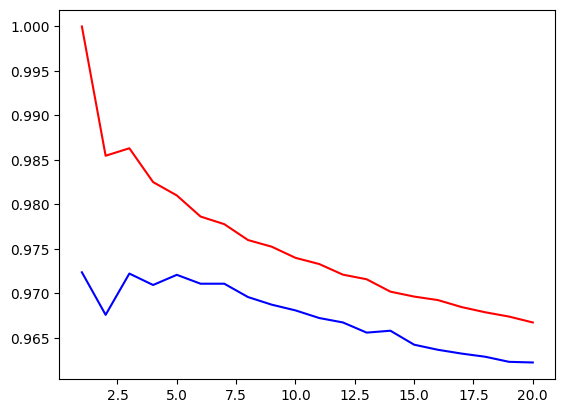

In [104]:
plt.plot(k, training_acc, "r")
plt.plot(k, testing_acc, "b")

The red line is the training accuracy and the blue line is the testing accuracy. It looks like the point of diminishing returns is at about k =3; after this point, both the training and testing accuracy start to plummet. So, the best k appears to be 3.

c) Using the best model from b), pick an image at random and plot it next to its K nearest neighbors

Text(0.5, 1.0, 'Random image is top left; 3-nearest are the other subplots')

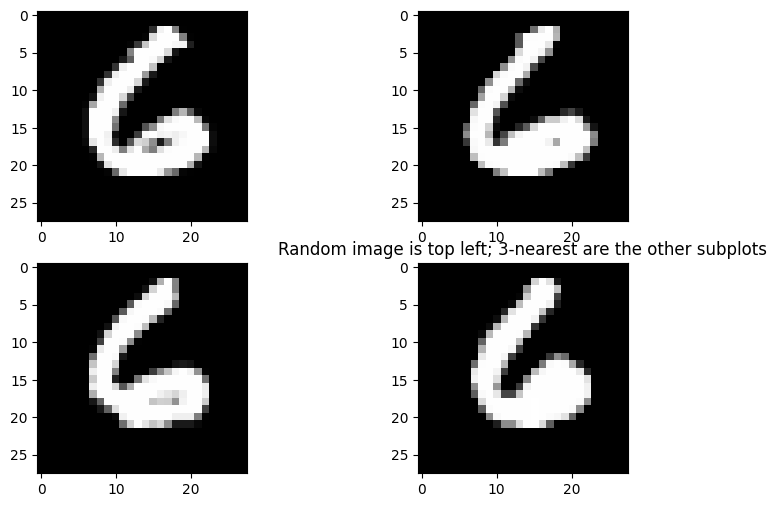

In [123]:
import matplotlib.cm as cm

best_k = 3
knn = KNeighborsClassifier(n_neighbors = best_k)
knn.fit(train, train_target)

random_image = test[np.random.randint(0, len(test))].reshape(1,-1)

nearest_neighbors = knn.kneighbors(random_image, best_k)

plt.figure(figsize=(9,6))
ax = plt.subplot(2,2,1)
plt.imshow(random_image.reshape((28,28)), cmap = cm.Greys_r)
for i in range(0,3):
    ax = plt.subplot(2,2,i+2)
    plt.imshow(train[nearest_neighbors[1][0][i]].reshape((28,28)), cmap = cm.Greys_r)

plt.title("Random image is top left; 3-nearest are the other subplots")

d) Using a dimensionality reduction technique discussed in class, reduce the dimensionality of the dataset before applying a KNN model. Repeat b) and discuss similarities and differences to the previous model. Briefly discuss your choice of dimension and why you think the performance / accuracy of the model has changed.

In [127]:
from sklearn.pipeline import make_pipeline
from tqdm import tqdm
from sklearn.decomposition import TruncatedSVD

k = range(1,21)
reduce_train_acc = []
reduce_test_acc = []

model = make_pipeline(TruncatedSVD(n_components = 100), KNeighborsClassifier())
model.fit(train, train_target)

for val in tqdm(k):
    model = make_pipeline(TruncatedSVD(n_components = 100), KNeighborsClassifier(n_neighbors = val))
    model.fit(train, train_target)
    train_pred = model.predict(train)
    test_pred = model.predict(test)
    reduce_train_acc.append(accuracy_score(train_pred, train_target))
    reduce_test_acc.append(accuracy_score(test_pred, test_target))

100%|██████████| 20/20 [06:03<00:00, 18.20s/it]


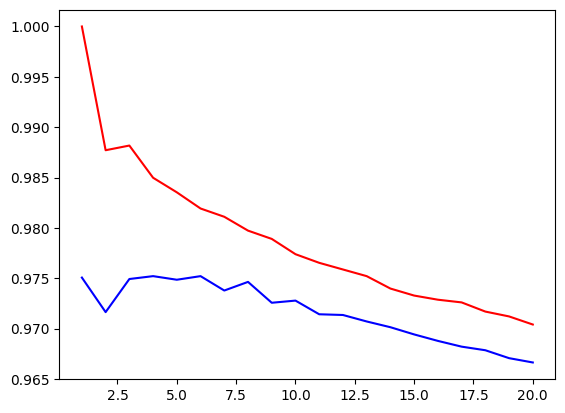

In [128]:
plt.plot(k, reduce_train_acc, "r")
plt.plot(k, reduce_test_acc, "b")

From Worksheet 10, I found that a rank of 100 was reasonably sufficient for this dataset. Since Worksheet 10 dealt with trying to use clustering to distinguish between different numbers, it seems reasonable that that rank would work again here, where we are still trying to predict what number an image is using knn. With the reduced dataset, the model fitting runs much, much quicker and it looks like our accuracies are slightly higher. This is likely because SVD helps reduce the amount of noise in the dataset, letting K-Nearest Neighbors focus on the general, most important trends.

## Midterm Prep (Part 1)

Compete in the Titanic Data Science Competition on Kaggle: https://www.kaggle.com/c/titanic 

Requirements:

1. Add at least 2 new features to the dataset (explain your reasoning below)
2. Use KNN (and only KNN) to predict survival
3. Explain your process below and choice of K
4. Make a submission to the competition and provide a link to your submission below.
5. Show your code below

In [186]:
import pandas as pd
from sklearn import preprocessing
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

#Add my features to the passed in dataframe
def add_features(df):
    df["is_child"] = df["Age"] < 18
    df["expensive_fare"] = df["Fare"] >= 50
    df["is_female"] = df["Sex"] == "female"

add_features(train_df)

#plt.scatter(x = train_df["Age"], y = train_df["Fare"], c = train_df["Survived"])

train_target = train_df["Survived"]
train_features = train_df.drop(["Survived", "Name", "Sex", "Ticket", "Cabin", "Embarked", "PassengerId"], axis = 1)

train_features = train_features.fillna(train_features.mean()) #Replace NA values with column mean

train_features = preprocessing.normalize(train_features) #Since my features have very different ranges, I'll normalize them all

#Find best k
acc = []
for k in range(1,21):

    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_features, train_target)

    p = classifier.predict(train_features)
    acc.append(accuracy_score(p, train_target))

print("List of accuracies for increasing k is", acc)
#Looks like the point of diminishing returns is around k = 4

classifier = KNeighborsClassifier(n_neighbors = 4)
classifier.fit(train_features, train_target)

#Modify test in same way as train
add_features(test_df)
pid = test_df["PassengerId"] #Store PassengerId's to use in submission
test_features = test_df.drop(["Name", "Sex", "Ticket", "Cabin", "Embarked", "PassengerId"], axis = 1)
test_features = test_features.fillna(test_features.mean())

test_features = preprocessing.normalize(test_features)

test_predictions = classifier.predict(test_features)

dict = {
        "PassengerId": pid,
        "Survived": test_predictions
}

predictions_df = pd.DataFrame(dict)

predictions_df.to_csv("my_predictions.csv", index = False)

List of accuracies for increasing k is [0.9764309764309764, 0.8630751964085297, 0.8686868686868687, 0.8316498316498316, 0.8282828282828283, 0.8148148148148148, 0.7991021324354658, 0.8002244668911336, 0.7991021324354658, 0.7957351290684624, 0.7912457912457912, 0.7710437710437711, 0.7643097643097643, 0.7575757575757576, 0.7564534231200898, 0.755331088664422, 0.7519640852974186, 0.7441077441077442, 0.7351290684624018, 0.7373737373737373]


My submission is from aidanc42, and when submitted, I was at 14562 on the leaderboard (https://www.kaggle.com/competitions/titanic/leaderboard) with an accuracy of 0.68660. 

I added a couple new features. First, I added a boolean feature is_child to represent whether the person was under 18 or not, since it appeared to me that younger people were more likely to survive. I also noticed that people with fares above around 50 were tremendously more likely to survive, so I added a boolean feature called expensive_fare to represent whether the person's fare was above 50 dollars. I also added a dummy variable called is_female. After dropping string columns, replacing missing values with the mean for the column, and normalizing the data, I iterated through various values for k to find the best one. It appeared that the point of diminishing returns for the training data was at around k = 4, so I decided to use 4 for my KNN implementation.